In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [32]:
df_pop = pd.read_excel("UK_census.xlsx", sheet_name="percentage").T
df_pop.columns = ["percentage"]
df_pop

,percentage
White2,87.1
"Gypsy / Traveller / Irish Traveller3,4",0.1
Mixed / Multiple Ethnic Groups5,2.0
Asian / Asian British: Indian,2.3
Asian / Asian British: Pakistani,1.9
Asian / Asian British: Bangladeshi,0.7
Asian / Asian British: Chinese,0.7
Asian / Asian British: Other Asian,1.4
Black / African / Caribbean / Black British6,3.0
Other Ethnic Group,0.9


In [34]:
df_arr = pd.read_csv("by-ethnicity-table.csv")
df_arr["percentage"] = df_arr["Rate per 1,000 people"]*100/df_arr["Rate per 1,000 people"].sum()
df_arr["Ethnicity"].isin(["All", "Asian", ""])

,Ethnicity,"Rate per 1,000 people",Number of arrests,percentage
0,All,12.0,"671,126",3.037975
1,Asian,12.0,"42,872",3.037975
2,Bangladeshi,14.0,"6,291",3.544304
3,Indian,6.0,"8,527",1.518987
4,Pakistani,14.0,"15,367",3.544304
5,Asian other,15.0,"12,687",3.797468
6,Black,32.0,"60,116",8.101266
7,Black African,23.0,"22,697",5.822785
8,Black Caribbean,33.0,"19,611",8.354430
9,Black other,64.0,"17,808",16.202532


<AxesSubplot:xlabel='Rate per 1,000 people', ylabel='Ethnicity'>

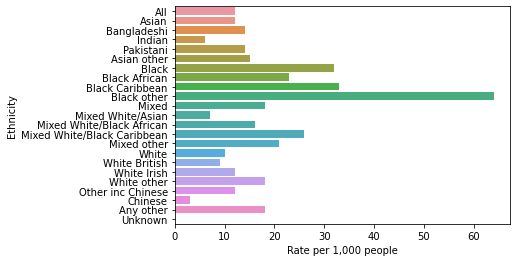

In [3]:
sns.barplot(data=df_arr, y="Ethnicity", x="Rate per 1,000 people")

In [4]:
df_list = []
for file in glob.glob("stop_search_data/*/*.csv"):
    df_list.append(pd.read_csv(file))

df_stop_all = pd.concat(df_list)

In [5]:
df_stop_all.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2020-01-01T00:55:00+00:00,NaN,NaN,51.451062,-2.596436,Male,25-34,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,True,False
1,Person search,2020-01-01T01:22:00+00:00,NaN,NaN,51.349567,-2.946702,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
2,Person search,2020-01-01T02:15:00+00:00,NaN,NaN,51.457808,-2.590766,Male,18-24,Other ethnic group - Not stated,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,True
3,Person and Vehicle search,2020-01-01T07:00:00+00:00,NaN,NaN,51.452697,-2.560291,Male,18-24,Other ethnic group - Not stated,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False
4,Person and Vehicle search,2020-01-01T07:00:00+00:00,NaN,NaN,51.452697,-2.560291,Female,18-24,Other ethnic group - Not stated,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False


In [6]:
df_stop_all = df_stop_all[df_stop_all["Part of a policing operation"].isna()]

In [7]:
df_stop_all["Officer-defined ethnicity"].value_counts()

White    100310
Asian     11869
Black      9477
Other      2948
Mixed       382
Name: Officer-defined ethnicity, dtype: int64

<AxesSubplot:xlabel='Officer-defined ethnicity', ylabel='count'>

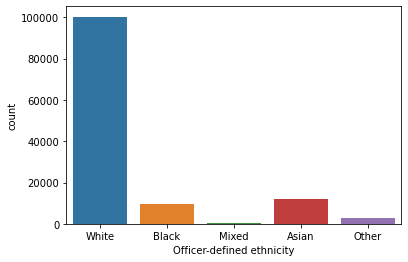

In [8]:
sns.countplot(x=df_stop_all["Officer-defined ethnicity"])

In [9]:
pd.crosstab(df_stop_all["Officer-defined ethnicity"], df_stop_all["Legislation"])

Legislation,Aviation Security Act 1982 (section 27(1)),Conservation of Seals Act 1970 (section 4),Criminal Justice Act 1988 (section 139B),Criminal Justice and Public Order Act 1994 (section 60),Crossbows Act 1987 (section 4),Customs and Excise Management Act 1979 (section 163),Deer Act 1991 (section 12),Firearms Act 1968 (section 47),Misuse of Drugs Act 1971 (section 23),Poaching Prevention Act 1862 (section 2),Police and Criminal Evidence Act 1984 (section 1),Police and Criminal Evidence Act 1984 (section 6),Protection of Badgers Act 1992 (section 11),Psychoactive Substances Act 2016 (s36(2)),Psychoactive Substances Act 2016 (s37(2)),Public Stores Act 1875 (section 6),Wildlife and Countryside Act 1981 (section 19)
Officer-defined ethnicity,,,,,,,,,,,,,,,,,
Asian,0,0,2,140,0,1,1,245,8682,2,2688,0,0,5,0,0,0
Black,0,0,0,104,0,0,0,53,6747,2,2357,0,0,9,0,0,0
Mixed,0,0,0,0,0,0,0,0,260,0,120,0,0,0,0,0,0
Other,0,0,0,24,1,0,0,26,1887,0,948,0,0,0,0,0,0
White,2,1,20,532,2,1,12,269,69844,159,28137,1,2,32,1,8,9


In [24]:
df_stop_all["Legislation"].value_counts().to_frame()

,Legislation
Misuse of Drugs Act 1971 (section 23),104869
Police and Criminal Evidence Act 1984 (section 1),44462
Firearms Act 1968 (section 47),1192
Criminal Justice and Public Order Act 1994 (section 60),877
Poaching Prevention Act 1862 (section 2),173
Psychoactive Substances Act 2016 (s36(2)),48
Criminal Justice Act 1988 (section 139B),43
Deer Act 1991 (section 12),15
Wildlife and Countryside Act 1981 (section 19),11
Public Stores Act 1875 (section 6),8


In [16]:
df_stop = df_stop_all[df_stop_all["Legislation"].isin(df_stop_all["Legislation"].value_counts()[:4].index)]

In [17]:
pd.crosstab(df_stop["Legislation"], df_stop["Officer-defined ethnicity"])

Officer-defined ethnicity,Asian,Black,Mixed,Other,White
Legislation,,,,,
Criminal Justice and Public Order Act 1994 (section 60),140,104,0,24,532
Firearms Act 1968 (section 47),245,53,0,26,269
Misuse of Drugs Act 1971 (section 23),8682,6747,260,1887,69844
Police and Criminal Evidence Act 1984 (section 1),2688,2357,120,948,28137


<AxesSubplot:xlabel='Officer-defined ethnicity', ylabel='count'>

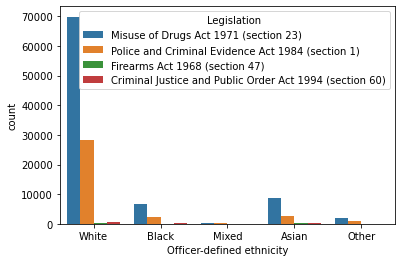

In [18]:
sns.countplot(x=df_stop["Officer-defined ethnicity"], hue=df_stop["Legislation"])

In [77]:
pd.crosstab(df_stop["Officer-defined ethnicity"], df_stop["Removal of more than just outer clothing"])

Removal of more than just outer clothing,False,True
Officer-defined ethnicity,,
Asian,8851,390
Black,7211,624
Mixed,352,28
Other,2472,69
White,74191,2376


<AxesSubplot:xlabel='Officer-defined ethnicity', ylabel='count'>

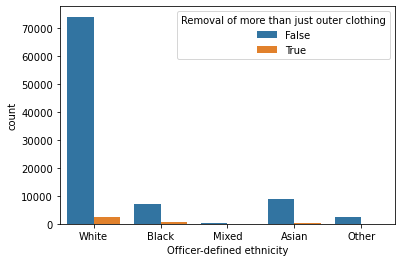

In [78]:
sns.countplot(x=df_stop["Officer-defined ethnicity"], hue=df_stop["Removal of more than just outer clothing"])